In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v2', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
k_sim1 = m_cii.k_sim
Pk_sim1 = m_cii.Pk_sim

Loading .npz catalogues...


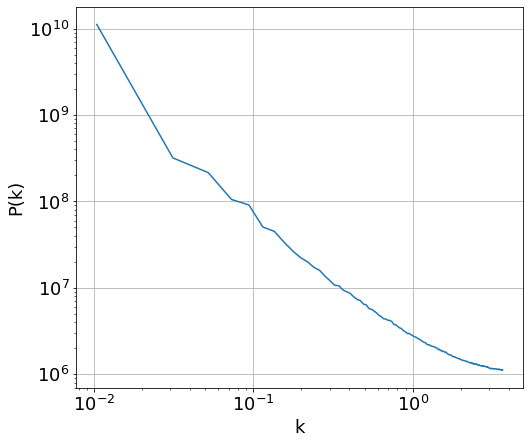

In [4]:
plt.plot(k_sim1, Pk_sim1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.grid()

Selecting the paths to the lightcones

In [3]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'

In [4]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]

In [5]:
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')

In [6]:
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

In [7]:
for i in range(len(onlyfiles)):
    print(f"'{onlyfiles[i]}'")

'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13767.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13617.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_14027.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13673.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13739.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13839.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13645.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13993.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13719.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13957.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13593.npz'
'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13829.npz'
'/home/dongwooc/scratchspace

In [ ]:
k_sim_i = [0 for i in range(len(onlyfiles))]
Pk_sim_i = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    print('Loading', i, 'th lightcone...')
    m_cii.update(catalogue_file = f"{onlyfiles[i]}")
    print('Finished loading', i, 'th lightcone')
    print('Computing k...')
    k_sim_i[i] = m_cii.k_sim
    print('Computing Pk...')
    Pk_sim_i[i] = m_cii.Pk_sim
    print('Done!')

Loading 0 th lightcone...
Finished loading 0 th lightcone
Computing k...
Loading .npz catalogues...
Computing Pk...
Done!
Loading 1 th lightcone...
Finished loading 1 th lightcone
Computing k...
Loading .npz catalogues...
Computing Pk...
Done!
Loading 2 th lightcone...
Finished loading 2 th lightcone
Computing k...
Loading .npz catalogues...
Computing Pk...
Done!
Loading 3 th lightcone...
Finished loading 3 th lightcone
Computing k...
Loading .npz catalogues...
Computing Pk...
Done!
Loading 4 th lightcone...
Finished loading 4 th lightcone
Computing k...
Loading .npz catalogues...
Computing Pk...
Done!
Loading 5 th lightcone...
Finished loading 5 th lightcone
Computing k...
Loading .npz catalogues...
Computing Pk...
Done!
Loading 6 th lightcone...
Finished loading 6 th lightcone
Computing k...
Loading .npz catalogues...
Computing Pk...
Done!
Loading 7 th lightcone...
Finished loading 7 th lightcone
Computing k...
Loading .npz catalogues...
Computing Pk...
Done!
Loading 8 th lightcone..

In [42]:
onlyfiles[0]

'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13767.npz'

In [6]:
m_cii.catalogue_file

'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz'

In [4]:
m_cii.update(catalogue_file = '/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13767.npz')

In [12]:
m_cii.reset()

AttributeError: k_sim

In [49]:
m_cii._update_list

['k_sim', '_Pk_dict', 'maps', 'L_halos', 'halos', 'halo_info']

In [68]:
m_cii.reset()

AttributeError: k_sim

In [62]:
m_co = lim('TonyLi_PhII', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [63]:
m_co.update(tobs = 4000*u.h)

In [55]:
m_cii.update(nuObs = 4000*u.Gh)

AttributeError: k_sim

In [65]:
m_cii._input_params

{'cosmo_model': 'Planck15',
 'model_type': 'ML',
 'model_name': 'LichenCII_v2',
 'model_par': {'M0': 1900000000.0,
  'Mmin': 20000000000,
  'alpha_MH1': 0.74,
  'alpha_LCII': 0.017,
  'BehrooziFile': 'sfr_reinterp.dat'},
 'nu': <Quantity 1897. GHz>,
 'nuObs': <Quantity 250. GHz>,
 'Mmin': <Quantity 1.e+10 solMass>,
 'Mmax': <Quantity 1.e+14 solMass>,
 'nM': 5000,
 'hmf_model': 'Tinker08',
 'Lmin': <Quantity 100. solLum>,
 'Lmax': <Quantity 1.e+08 solLum>,
 'nL': 5000,
 'kmin': <Quantity 0.01 1 / Mpc>,
 'kmax': <Quantity 10. 1 / Mpc>,
 'nk': 100,
 'sigma_scatter': 0.0,
 'fduty': 1.0,
 'do_onehalo': False,
 'do_Jysr': True,
 'linear_k': False,
 'nonlinear_Pm': False,
 'Tsys_NEFD': <Quantity 72.5 mJy s(1/2)>,
 'Nfeeds': 120,
 'beam_FWHM': <Quantity 48. arcsec>,
 'Delta_nu': <Quantity 60. GHz>,
 'dnu': <Quantity 1.11 GHz>,
 'tobs': <Quantity 2000. h>,
 'Omega_field': <Quantity 4. deg2>,
 'Nfield': 4,
 'line_width': <Quantity 0. km / s>,
 'Tmin_VID': <Quantity 0.01 uK>,
 'Tmax_VID': <Quanti